In [146]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('dataset/carprices.csv')
df1=pd.read_csv('dataset/carprices.csv')
df.head(n=20)

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

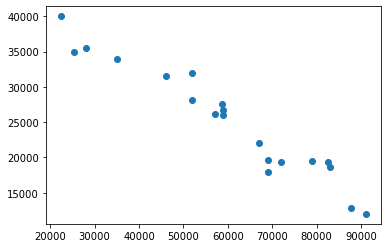

In [129]:
plt.scatter(df['Mileage'],df['Sell Price($)'])


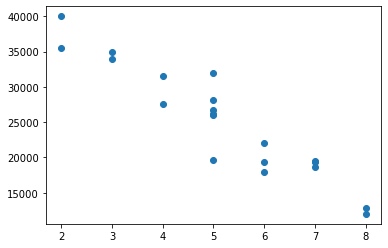

In [130]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

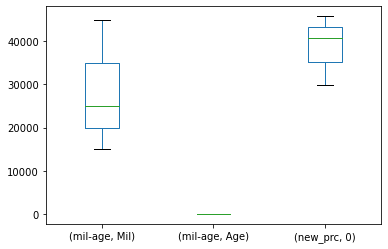

In [141]:
df.plot(kind='box')
plt.show()

In [142]:
df.corr()

mil-age             new_prc
                  Mil       Age         0
mil-age Mil  1.000000 -0.995871 -0.999869
        Age -0.995871  1.000000  0.997209
new_prc 0   -0.999869  0.997209  1.000000

In [17]:
# Based on this visualization we are going to create linear regression model

X = df[['Mileage','Age(yrs)']] # Independent variable training dataset
y = df['Sell Price($)']        # Dependent variable for output feature

In [19]:
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [15]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # 0.2 mean it will be 80% of my total data size for train model
                                                                    #random_state=10
    # if we use random state then my sample training data set will not change but if we not define then it will change every 
    # time we run this method

In [68]:
X_train,X_test

(    Mileage  Age(yrs)
 18    87600         8
 5     59000         5
 14    82450         7
 1     35000         3
 13    58780         4
 19    52000         5
 7     72000         6
 17    69000         5
 4     46000         4
 3     22500         2
 11    79000         7
 2     57000         5
 6     52000         5
 12    59000         5
 9     67000         6
 16    28000         2,
     Mileage  Age(yrs)
 15    25400         3
 8     91000         8
 0     69000         6
 10    83000         7)

In [34]:
y_train,y_test

(19    28200
 15    35000
 7     19300
 3     40000
 9     22000
 1     34000
 8     12000
 16    35500
 12    26000
 4     31500
 18    12800
 2     26100
 5     26750
 13    27500
 17    19700
 11    19500
 Name: Sell Price($), dtype: int64,
 0     18000
 14    19400
 10    18700
 6     32000
 Name: Sell Price($), dtype: int64)

In [69]:
len(X_train), len(X_test) , len(y_train), len(y_test) # so here we can see training model take 80% of my data set and 20% wil
                                                     # be for Test the model

(16, 4, 16, 4)

In [131]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [132]:
clf.fit(X_train,y_train)

LinearRegression()

In [72]:
clf.predict(X_test)

array([39131.68214432, 13915.39731021, 22147.41410622, 16719.26150706])

In [73]:
y_test

15    35000
8     12000
0     18000
10    18700
Name: Sell Price($), dtype: int64

In [74]:
# Checking accuracy which will generally check X_test and y_test accouracy
clf.score(X_test,y_test)

0.8562698792566987

In [ ]:
# here we found 85% accouracy of our model.

In [84]:
predictions=clf.predict(X_test)

In [85]:
predictions

array([39131.68214432, 13915.39731021, 22147.41410622, 16719.26150706])

In [100]:
clf.predict(X_test)

array([39131.68214432, 13915.39731021, 22147.41410622, 16719.26150706])

In [139]:
from sklearn import linear_model

In [143]:
clf.coef_

array([-4.37381400e-01,  6.95187006e+02])

In [144]:
clf.intercept_

48155.608695403236

In [106]:
Tst_d={'Mil':[25000,15000,45000],
     'Age':[5,6,2],
     }

In [107]:
tst_df=pd.DataFrame(Tst_d)
tst_df.head()

,Mil,Age
0,25000,5
1,15000,6
2,45000,2


In [112]:
clf_a=clf.predict(tst_df)
clf_a=pd.DataFrame(clf_a)

In [135]:
df=pd.concat([tst_df,clf_a],axis=1,keys=['mil-age','new_prc'])
df

mil-age           new_prc
      Mil Age             0
0   25000   5  40697.008717
1   15000   6  45766.009727
2   45000   2  29863.819691

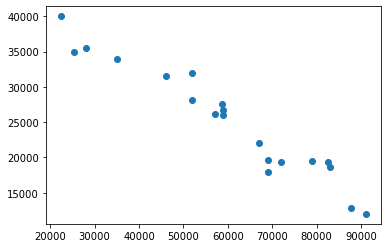

In [147]:
plt.scatter(df1['Mileage'],df1['Sell Price($)'])

ValueError: x and y must be the same size

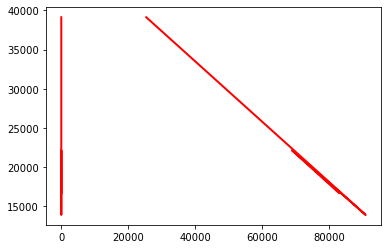

In [160]:

plt.plot(X_test,clf.predict(X_test),color='red',linewidth=2)
plt.scatter(tst_df,clf_a)